In [1]:
#check_rates.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 25 October 2017.
#confirm that M advances at rate Kappa and wt advances as Omega - Kappa

In [2]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [3]:
#restore output
from helper_fns import *
execfile('inputs.py')
r, t, vr, vt, times, lambda0 = restore_output(output_folder)
a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)

In [4]:
e[0]

array([[3.47337359e-03],
       [6.71560861e-06],
       [2.99740439e-06],
       [2.17538626e-04],
       [1.22318398e-06],
       [8.71157735e-03],
       [7.14389430e-05],
       [2.25340096e-04],
       [1.29040164e-04],
       [2.72726556e-04],
       [5.12368977e-06]])

In [5]:
#select a streamline
idx = 2
rp = r[:, idx].flatten()
tp = t[:, idx].flatten()
wtp = wt[:, idx].flatten()
wtp_unwrapped = unwrap_angle(wtp)
Mp = M[:, idx].flatten()
Mp_unwrapped = unwrap_angle(Mp)
a0 = a[0, idx][0]
e0 = e[0, idx][0]
q0 = a0/np.sqrt(1.0 + 2.0*e0)
Q0 = a0/np.sqrt(1.0 - 2.0*e0)
print len(times), len(rp), len(tp), len(wtp)
print a0, e0, q0, Q0

32001 32001 32001 32001
1.02 2.9974043938959237e-06 1.0199969426612645 1.020003057366228


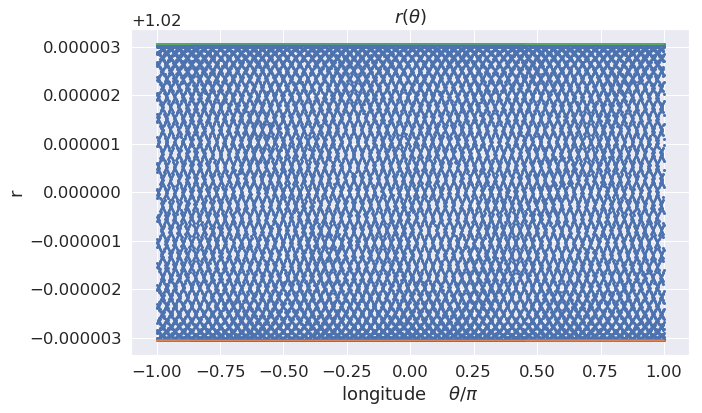

In [6]:
#plot r(theta) and confirm that q<r<Q
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(tp/np.pi, rp, marker='o', markersize=2, linestyle='none')
p = ax.plot(tp/np.pi, rp*0 + q0, linestyle='-')
p = ax.plot(tp/np.pi, rp*0 + Q0, linestyle='-')
p = ax.set_title('$r(\\theta)$')
p = ax.set_xlabel('longitude    $\\theta/\pi$')
p = ax.set_ylabel('r')

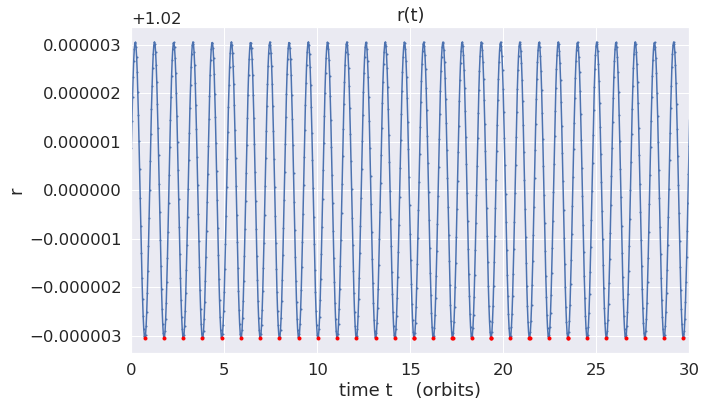

In [7]:
#plot r(time)...red dots indicate times of periapse passage
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(times/(2.0*np.pi), rp, marker='o', markersize=1, linestyle='-')
p = ax.set_title('r(t)')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel('r')
p = ax.set_xlim(0, 30)
p = tm_peri = (rp < 1.00000002*q0)
p = ax.plot(times[tm_peri]/(2.0*np.pi), rp[tm_peri], marker='o', markersize=3, linestyle='none', color='red')

(0, 200)

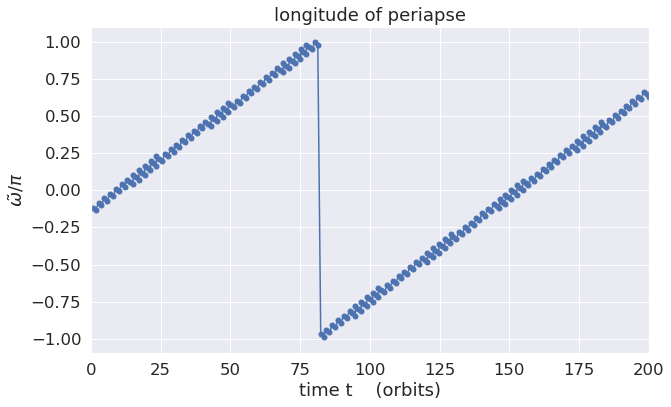

In [8]:
#extract longitude of peri from r(time) plot
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times[tm_peri]/(2.0*np.pi), tp[tm_peri]/np.pi, marker='o', markersize=5, linestyle='-')
ax.set_title('longitude of periapse')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel(r'$\tilde{\omega}/\pi$')
ax.set_xlim(0, 200)

(0, 200)

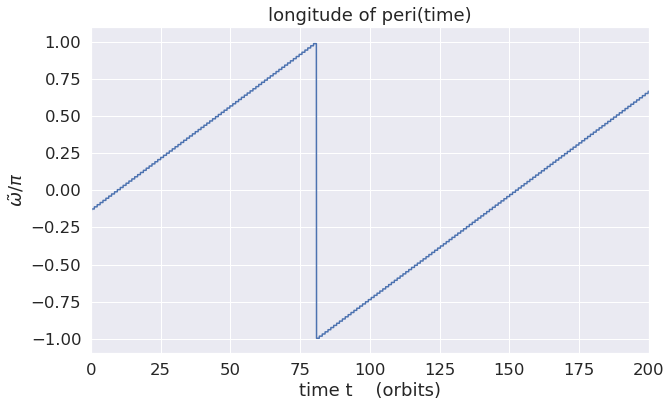

In [9]:
#plot wtp(time) and confirm that it replicates the above
f, ax = plt.subplots(figsize=(10, 6))
ax.plot(times/(2.0*np.pi), wtp/np.pi, linestyle='-')
ax.set_title('longitude of peri(time)')
ax.set_xlabel('time t    (orbits)')
ax.set_ylabel(r'$\tilde{\omega}/\pi$')
ax.set_xlim(0, 200)

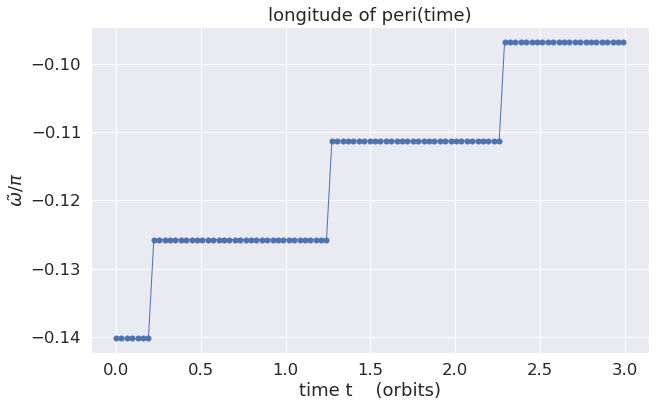

In [10]:
#plot wtp(time) and note that it stagger-steps after every apoapse passage
f, ax = plt.subplots(figsize=(10, 6))
idx = (times/(2.0*np.pi) < 3.0)
p = ax.plot(times[idx]/(2.0*np.pi), wtp[idx]/np.pi, marker='.', markersize=10, linestyle='-', linewidth=1)
p = ax.set_title('longitude of peri(time)')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel(r'$\tilde{\omega}/\pi$')

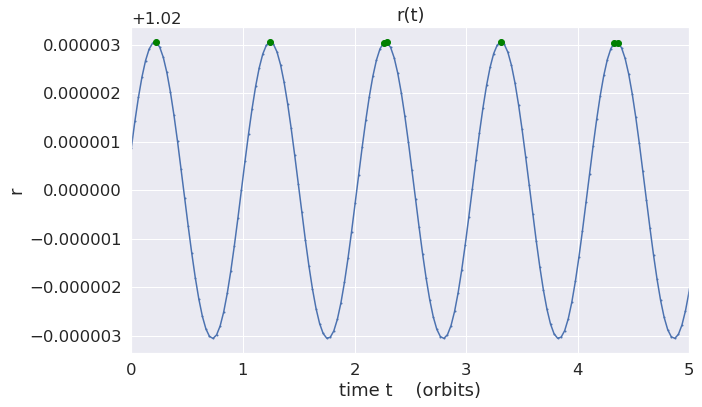

In [11]:
#plot r(time)...green dots indicate times of apoapse passage
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(times/(2.0*np.pi), rp, marker='o', markersize=1, linestyle='-')
p = ax.set_title('r(t)')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel('r')
p = ax.set_xlim(0, 5)
tm_peri = (rp > 0.99999998*Q0)
p = ax.plot(times[tm_peri]/(2.0*np.pi), rp[tm_peri], marker='o', markersize=6, linestyle='none', color='green')

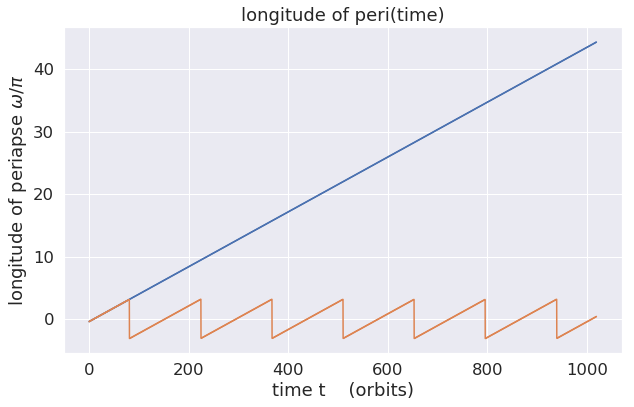

In [12]:
#plot wtp_unwrapped(time)
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(times/(2.0*np.pi), wtp_unwrapped, linestyle='-')
p = ax.plot(times/(2.0*np.pi), wtp, linestyle='-')
p = ax.set_title('longitude of peri(time)')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel('longitude of periapse $\omega/\pi$')

In [13]:
#calculate observed and expected precession rates
a0 = a[0].flatten()
dwdt_obs = np.zeros_like(a0)
for pidx in range(len(dwdt_obs)):
    wt_unwrapped = unwrap_angle(wt[:, pidx].flatten())
    dwdt_obs[pidx] = (wt_unwrapped[-1] - wt_unwrapped[0])/(times[-1] - times[0])
dwdt_exp = Omega(J2, Rp, a0) - Kappa(J2, Rp, a0)
GM = 1.0
mean_motion = np.sqrt(GM/a0)/a0
dwdt_alt = 1.5*J2*((Rp/a0)**2)*mean_motion

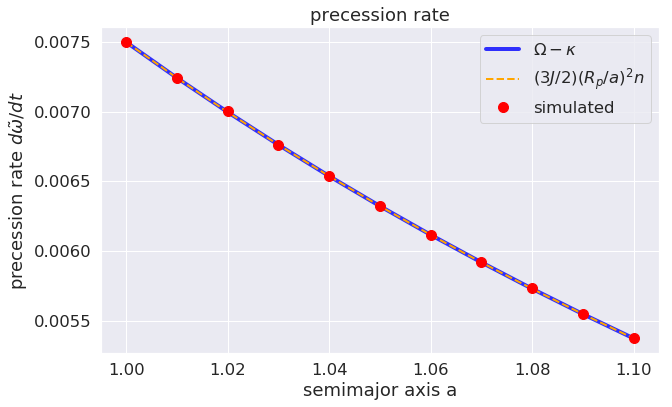

In [14]:
#compare precession rates
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(a0, dwdt_exp, linestyle='-', label='$\Omega - \kappa$', color='blue', linewidth=4, alpha=0.8)
p = ax.plot(a0, dwdt_alt, linestyle='--', label='$(3J/2)(R_p/a)^2n$', color='orange', linewidth=2, alpha=1.0)
p = ax.plot(a0, dwdt_obs, marker='o', markersize=10, linestyle='none', label='simulated', color='red')
p = ax.set_title('precession rate')
p = ax.set_xlabel('semimajor axis a')
p = ax.set_ylabel(r'precession rate $d\tilde{\omega}/dt$')
p = ax.legend()

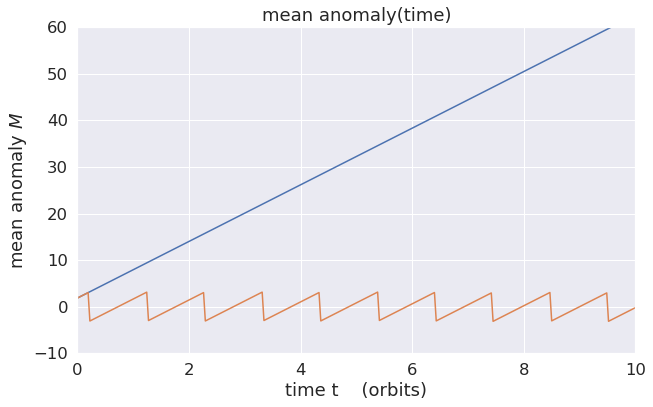

In [15]:
#plot Mp_unwrapped(time)
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(times/(2.0*np.pi), Mp_unwrapped, linestyle='-')
p = ax.plot(times/(2.0*np.pi), Mp, linestyle='-')
p = ax.set_title('mean anomaly(time)')
p = ax.set_xlabel('time t    (orbits)')
p = ax.set_ylabel('mean anomaly $M$')
p = ax.set_xlim(0, 10)
p = ax.set_ylim(-10, 60)

In [16]:
#calculate observed and expected epicyclic frequencies dM/dt = Kappa
a0 = a[0].flatten()
dMdt_obs = np.zeros_like(a0)
for pidx in range(len(dMdt_obs)):
    M_unwrapped = unwrap_angle(M[:, pidx].flatten())
    dMdt_obs[pidx] = (M_unwrapped[-1] - M_unwrapped[0])/(times[-1] - times[0])
dMdt_exp = Kappa(J2, Rp, a0)

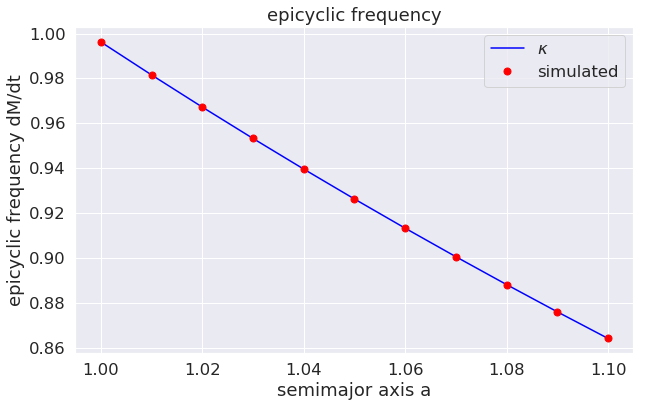

In [17]:
#compare epicyclic frequencies
f, ax = plt.subplots(figsize=(10, 6))
p = ax.plot(a0, dMdt_exp, linestyle='-', label='$\kappa$', color='blue')
p = ax.plot(a0, dMdt_obs, marker='o', markersize=7, linestyle='none', label='simulated', color='red')
p = ax.set_title('epicyclic frequency')
p = ax.set_xlabel('semimajor axis a')
p = ax.set_ylabel('epicyclic frequency dM/dt')
p = ax.legend()